# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import json


import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from IPython.display import HTML, display

import warnings
warnings.filterwarnings('ignore')

Se cargan los datos a continuación

In [2]:
# Cargamos los datos, solo para US
csv_path: str = 'youtube-new/USvideos.csv'
json_path: str = 'youtube-new/US_category_id.json'

# Cargo los datos
df = pd.read_csv(csv_path)

In [3]:
# Cargo el json
with open(json_path) as f:
    categories = json.load(f)

Normalizamos el json y hacemos un merge con el df anterior

In [4]:
# Normalizamos el json
categories = pd.json_normalize(categories['items'])
categories = categories[['id', 'snippet.title']]
categories.columns = ['category_id', 'category_name']
categories['category_id'] = categories['category_id'].astype(int)

In [5]:
# Hacemos un merge con el df
df = df.merge(categories, on='category_id', how='left')
df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,category_name
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


Transformamos las columnas a datetime y creamos nuevas columnas

In [6]:
# Transformamos la columna trending_date a datetime
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')

In [7]:
# Transformamos la columna publish_time a datetime
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

A continuación se obtiene la fecha, el tiempo y la hora, el día de la semana, el mes, el porcentaje de dislikes, el logaritmo de las vistas, el logaritmo de los likes, el logaritmo de los dislikes y el logaritmo de los comentarios

In [8]:
# Se obtiene el la fecha, el tiempo y la hora, el día de la semana, el mes
df['publish_date'] = df['publish_time'].dt.date
df['publish_time_'] = df['publish_time'].dt.time
df['publish_hour'] = df['publish_time'].dt.hour
df['publish_day'] = df['publish_time'].dt.day_name()
df['publish_month'] = df['publish_time'].dt.month

In [9]:
# Obtenemos el porcentaje de dislikes
df['dislike_percentage'] = df['dislikes'] / (df['dislikes'] + df['likes'])

Como existen algunos videos con cero likes o dislikes, etc., se suma uno a cada columna para evitar errores en el logaritmo.

In [10]:
# Logaritmo de las vistas
df['log_views'] = np.log(df['views']+1)
df['log_likes'] = np.log(df['likes']+1)
df['log_dislikes'] = np.log(df['dislikes']+1)
df['log_comment_count'] = np.log(df['comment_count']+1)

Se obtienen variables como el ratio de likes, el ratio de dislikes, el ratio de comentarios, el ratio de vistas, el ratio de likes y dislikes, el ratio de likes y comentarios, el ratio de dislikes y comentarios, el ratio de likes y vistas, el ratio de dislikes y vistas, el ratio de comentarios y vistas, el ratio de likes y dislikes y comentarios, el ratio de likes y dislikes y vistas, el ratio de likes y comentarios y vistas, el ratio de dislikes y comentarios y vistas, el ratio de likes y dislikes y comentarios y vistas.

In [11]:
# Se suma 1 a cada columna para evitar errores en la división por cero
df['ratio_likes'] = (df['likes']+1) / (df['views']+1)
df['ratio_dislikes'] = (df['dislikes']+1) / (df['views']+1)
df['ratio_comments'] = (df['comment_count']+1) / (df['views']+1)
df['ratio_likes_dislikes'] = (df['likes']+1) / (df['dislikes']+1)
df['ratio_likes_comments'] = (df['likes']+1) / (df['comment_count']+1)
df['ratio_dislikes_comments'] = (df['dislikes']+1) / (df['comment_count']+1)

df['ratio_likes_dislikes_comments'] = (df['likes']+1) / (df['dislikes']+1) / (df['comment_count']+1)
df['ratio_likes_dislikes_views'] = (df['likes']+1) / (df['dislikes']+1) / (df['views']+1)
df['ratio_likes_comments_views'] = (df['likes']+1) / (df['comment_count']+1) / (df['views']+1)
df['ratio_dislikes_comments_views'] = (df['dislikes']+1) / (df['comment_count']+1) / (df['views']+1)
df['ratio_likes_dislikes_comments_views'] = (df['likes']+1) / (df['dislikes']+1) / (df['comment_count']+1) / (df['views']+1)

Se obtiene el número de días que un video tarda en convertirse en tendencia, para esto, elimos el primer día que fue tendencia y el último día que fue tendencia y se obtiene la diferencia en días.

In [12]:
df.sort_values(['video_id', 'trending_date']).head(20)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,ratio_dislikes,ratio_comments,ratio_likes_dislikes,ratio_likes_comments,ratio_dislikes_comments,ratio_likes_dislikes_comments,ratio_likes_dislikes_views,ratio_likes_comments_views,ratio_dislikes_comments_views,ratio_likes_dislikes_comments_views
39169,-0CMnp02rNY,2018-06-06,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",475965,6531,172,...,0.000363,0.000571,37.757225,24.014706,0.636029,0.138813,0.000079,0.000050,1.336292e-06,2.916455e-07
39375,-0CMnp02rNY,2018-06-07,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",605506,7848,232,...,0.000385,0.000586,33.686695,22.109859,0.656338,0.094892,0.000056,0.000037,1.083948e-06,1.567151e-07
39584,-0CMnp02rNY,2018-06-08,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",705986,8930,277,...,0.000394,0.000527,32.125899,24.008065,0.747312,0.086360,0.000046,0.000034,1.058535e-06,1.223251e-07
39795,-0CMnp02rNY,2018-06-09,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",754273,9395,303,...,0.000403,0.000509,30.907895,24.468750,0.791667,0.080489,0.000041,0.000032,1.049574e-06,1.067110e-07
40007,-0CMnp02rNY,2018-06-10,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",792613,9720,330,...,0.000418,0.000522,29.368580,23.480676,0.799517,0.070939,0.000037,0.000030,1.008709e-06,8.949955e-08
40208,-0CMnp02rNY,2018-06-11,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,...,0.000416,0.000530,29.351351,23.051887,0.785377,0.069225,0.000037,0.000029,9.812801e-07,8.649219e-08
15457,-0NYY8cqdiQ,2018-02-01,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,24,2018-01-29 14:00:39,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,...,0.000098,0.000169,80.545455,46.631579,0.578947,0.847847,0.000143,0.000083,1.026963e-06,1.503949e-06
31553,-1Hm41N0dUs,2018-04-29,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23,2018-04-27 07:30:02,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1566807,32752,393,...,0.000251,0.000952,83.129442,21.967136,0.264252,0.055754,0.000053,0.000014,1.686564e-07,3.558455e-08
31773,-1Hm41N0dUs,2018-04-30,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23,2018-04-27 07:30:02,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",1882352,38165,530,...,0.000282,0.000751,71.875706,27.010616,0.375796,0.050867,0.000038,0.000014,1.996417e-07,2.702333e-08
31992,-1Hm41N0dUs,2018-05-01,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23,2018-04-27 07:30:02,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,...,0.000282,0.000721,70.996558,27.777104,0.391246,0.047809,0.000034,0.000013,1.900620e-07,2.322504e-08


In [13]:
# Existen videos duplicados, porque han sido tendencia en varios días, crearemos datasets separados que tomarán el primer día que fue tendencia y el último día que fue tendencia
df_last = df.sort_values(['video_id', 'trending_date']).drop_duplicates(subset='video_id', keep='last')

In [14]:
print("Los videos de US contienen {} filas y {} columnas".format(df.shape[0], df.shape[1]))
print("Los videos de US en tendencia (last) contienen {} filas y {} columnas".format(df_last.shape[0], df_last.shape[1]))

Los videos de US contienen 40949 filas y 38 columnas
Los videos de US en tendencia (last) contienen 6351 filas y 38 columnas


In [15]:
# Tiempo en tendencia
df_last['time_to_trend'] = (df_last.trending_date - df_last.publish_time).dt.days

In [16]:
# Escogemos los 10 videos más populares
selected_columns = ['title', 'channel_title', 'thumbnail_link', 'publish_time', 'category_name']

# Corregimos la agregación
most_frequent = df_last.groupby(selected_columns)['video_id'].count().reset_index(name='code_count')
most_frequent = most_frequent.sort_values('code_count', ascending=False).head(10)

# Construction of HTML table with miniature photos assigned to the most popular movies
table_content = ''
max_title_length = 50

# Iteramos sobre el DataFrame
for index, row in most_frequent.iterrows():
    HTML_row = '<tr>'
    HTML_row += f'<td><img src="{row["thumbnail_link"]}" style="width:100px;height:100px;"></td>'
    HTML_row += f'<td>{row["channel_title"]}</td>'
    # Limitamos la longitud del título si es necesario
    title = row["title"][:max_title_length] + "..." if len(row["title"]) > max_title_length else row["title"]
    HTML_row += f'<td>{title}</td>'
    HTML_row += f'<td>{row["category_name"]}</td>'
    HTML_row += f'<td>{row["publish_time"]}</td>'
    table_content += HTML_row + '</tr>'

# Añadimos estilos CSS para mejorar la presentación
html_table = '''
<table style="border-collapse: collapse; width: 100%;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 12px; text-align: left;">Photo</th>
        <th style="padding: 12px; text-align: left;">Channel Name</th>
        <th style="padding: 12px; text-align: left; width: 250px;">Title</th>
        <th style="padding: 12px; text-align: left;">Category</th>
        <th style="padding: 12px; text-align: left;">Publish Date</th>
    </tr>
    {}
</table>
'''.format(table_content)

display(HTML(html_table))

Photo,Channel Name,Title,Category,Publish Date
,MickMake,#184 Making a PCB using EasyEDA. // Review,Science & Technology,2017-12-02 14:05:07
,Quad9 DNS,Quad9 How To Install with Windows,People & Blogs,2017-11-16 01:56:43
,Davie504,QUADRUPLE NECK BASS SOLO,Entertainment,2018-03-18 15:00:02
,Cleveland Browns,QB Luke Falk: Need to show you're a fearless playe...,Sports,2018-01-24 18:00:09
,Simon's Cat,Purrthday Cake (A 10th Birthday Special) - Simon's...,Pets & Animals,2018-03-04 09:00:01
,AnthonyPadilla,Puppy Bowl in Real Life (Way too many puppies),Comedy,2018-01-29 16:56:47
,Animal Planet,Puppy Bowl Spot Center: Top 5 Plays,Entertainment,2018-02-03 23:00:04
,Hydraulic Press Channel,Punching Huge Holes Through Everything with Hydrau...,Science & Technology,2018-02-17 14:52:06
,You Suck At Cooking,Pumpkin Pie - You Suck at Cooking (episode 68),Howto & Style,2017-11-15 14:52:38
,The King of Random,Proto-Putty in Liquid Nitrogen & Other Crazy Tests...,Education,2017-11-22 12:00:02


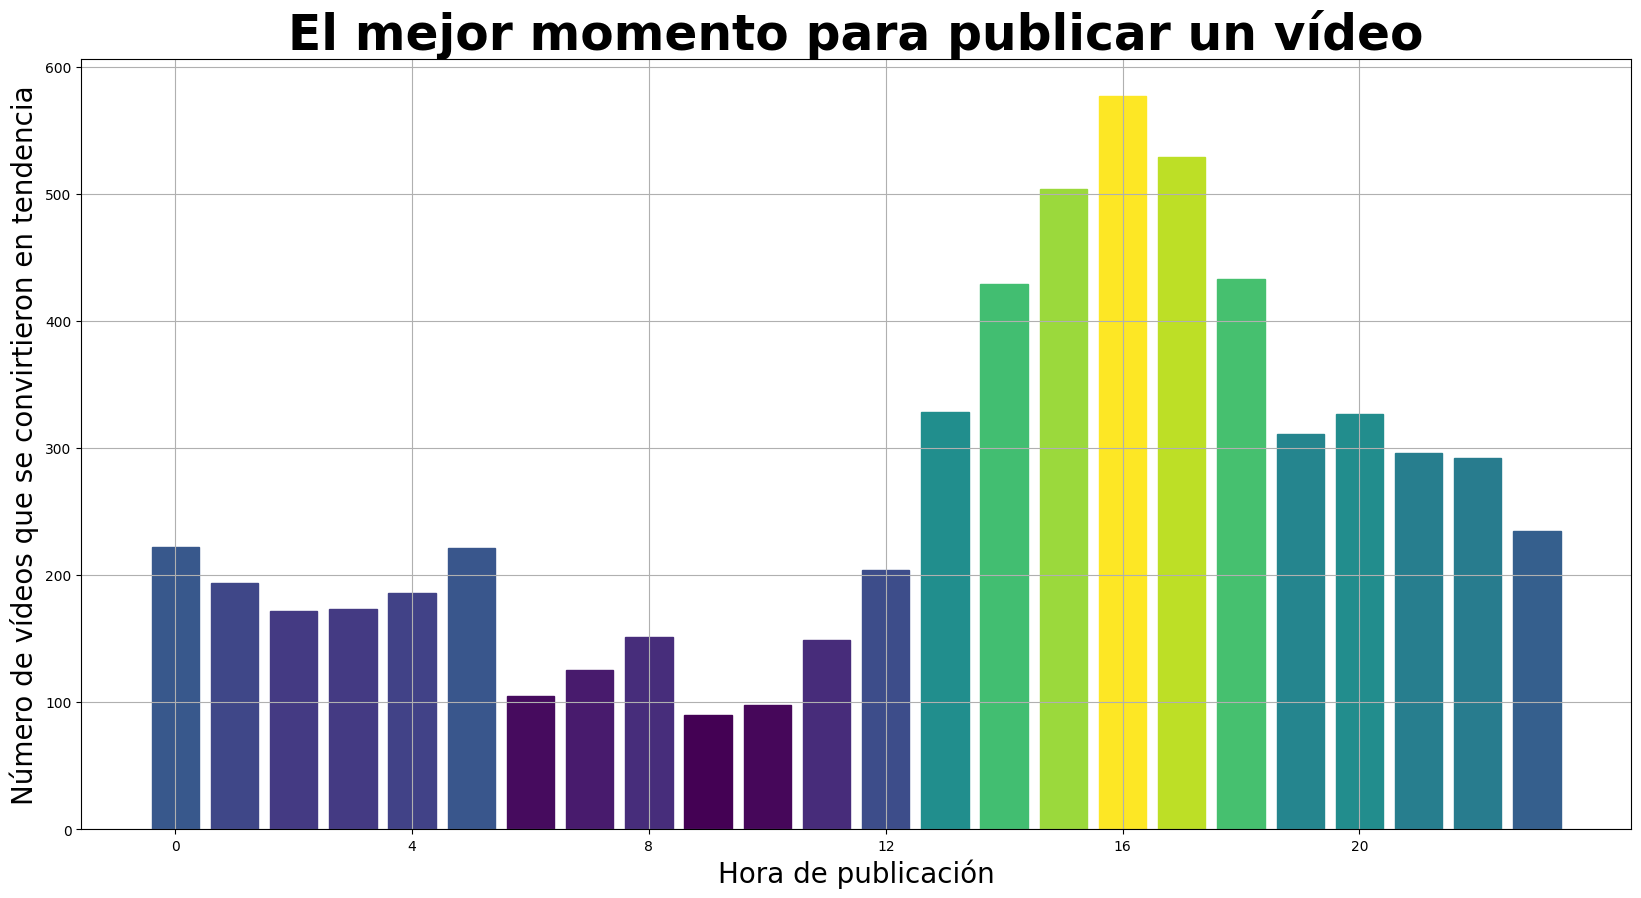

In [17]:
# Initialization of the list storing counters for subsequent publication hours
publish_h = [0] * 24

for index, row in df_last.iterrows():
    publish_h[row["publish_hour"]] += 1
    
values = publish_h
ind = np.arange(len(values))


# Creating new plot
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Número de vídeos que se convirtieron en tendencia', fontsize=20)
plt.xlabel('Hora de publicación', fontsize=20)
plt.title('El mejor momento para publicar un vídeo', fontsize=35, fontweight='bold')
plt.xticks(np.arange(0, len(ind), len(ind)/6), [0, 4, 8, 12, 16, 20])

plt.show()

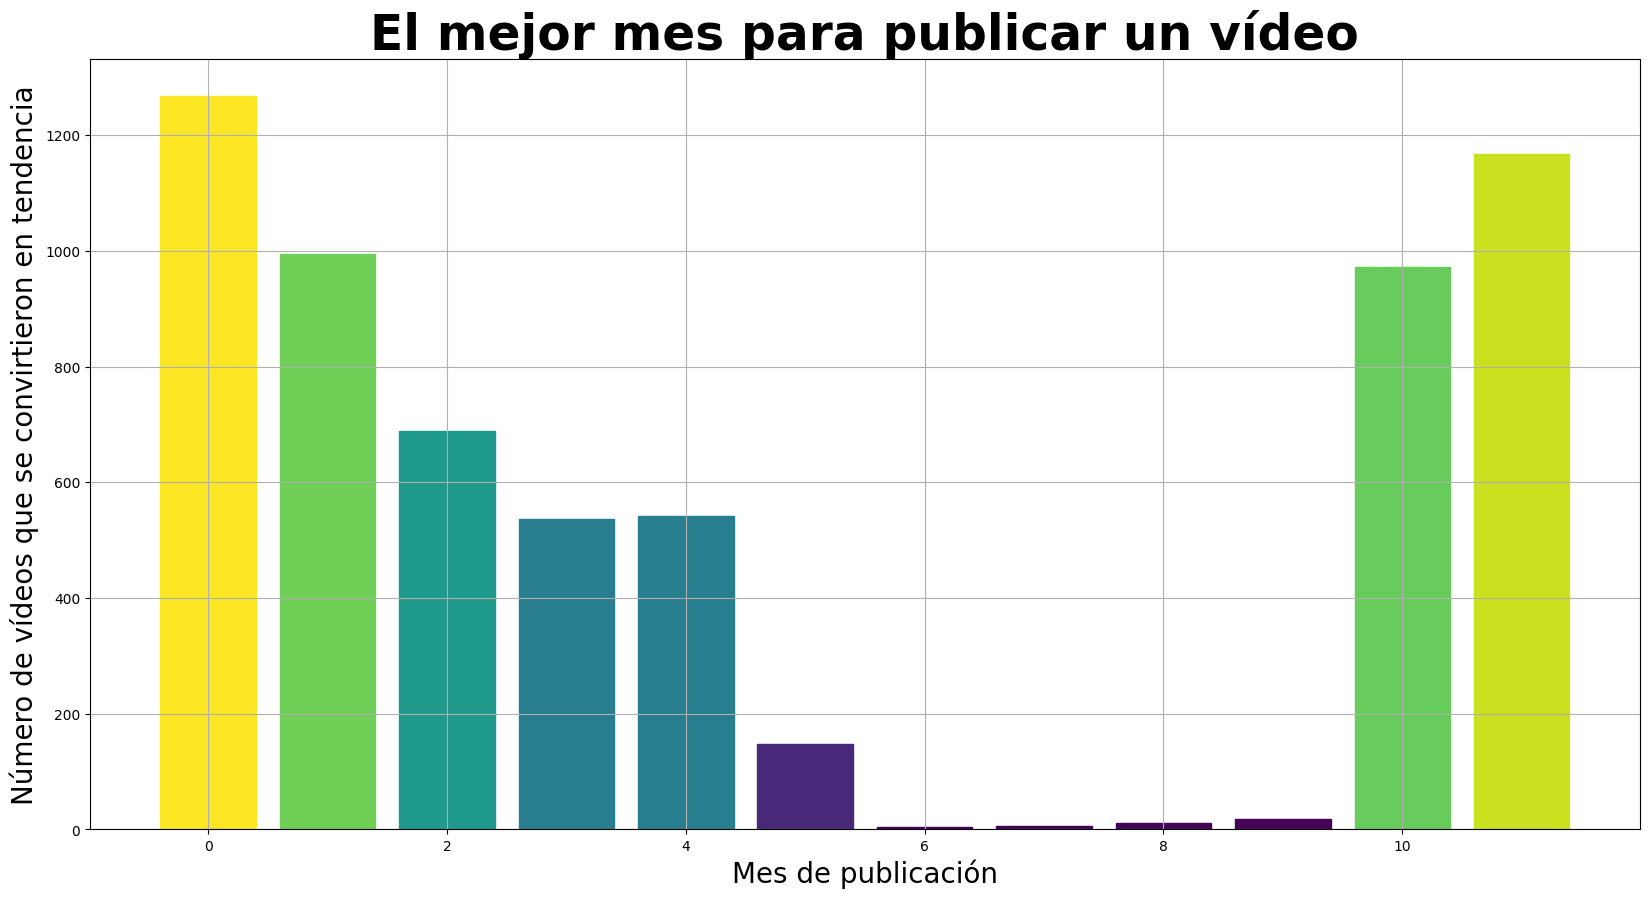

In [18]:
# Se realiza gráfico para ver el mes en que se publicaron los videos
publish_m = [0] * 12

for index, row in df_last.iterrows():
    publish_m[row["publish_month"] - 1] += 1
    
values = publish_m
ind = np.arange(len(values))

# Creating new plot

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.yaxis.grid()
ax.xaxis.grid()
bars = ax.bar(ind, values)

# Sampling of Colormap
for i, b in enumerate(bars):
    b.set_color(plt.cm.viridis((values[i] - min(values))/(max(values)- min(values))))
    
plt.ylabel('Número de vídeos que se convirtieron en tendencia', fontsize=20)
plt.xlabel('Mes de publicación', fontsize=20)
plt.title('El mejor mes para publicar un vídeo', fontsize=35, fontweight='bold')
#plt.xticks(np.arange(0, len(ind), len(ind)/6), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

plt.show()


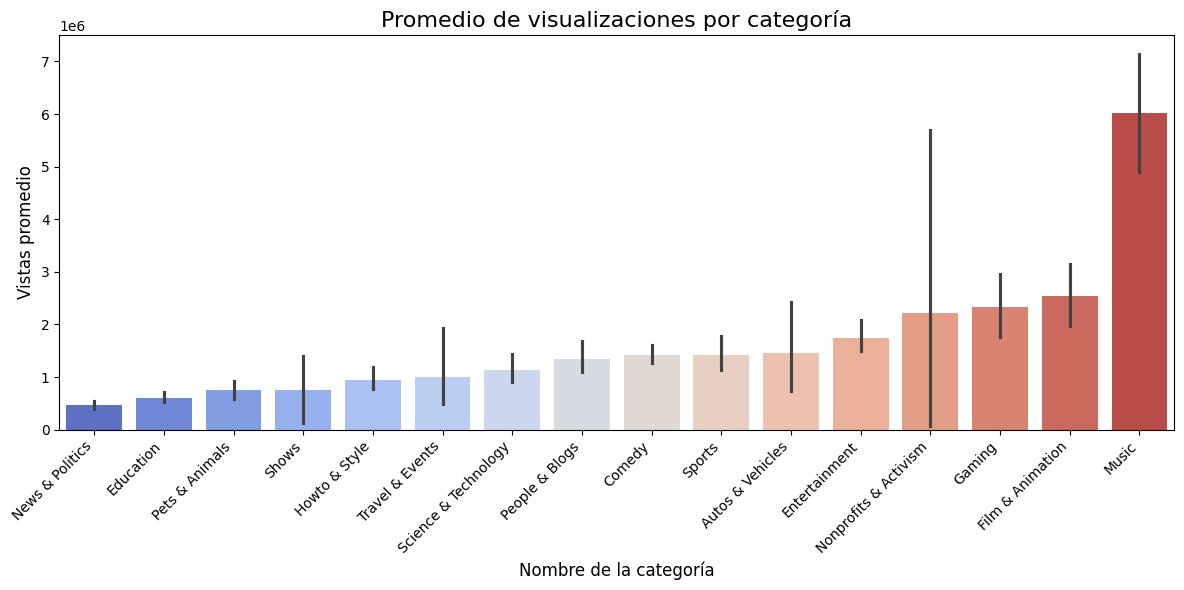

In [19]:
sorted_categories = df_last.groupby('category_name')['views'].mean().sort_values().index

plt.figure(figsize=(12, 6))  

sns.barplot(
    x='category_name',
    y='views',
    data=df_last,
    order=sorted_categories, 
    palette="coolwarm"       
)

plt.title("Promedio de visualizaciones por categoría", fontsize=16)
plt.xlabel("Nombre de la categoría", fontsize=12)
plt.ylabel("Vistas promedio", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

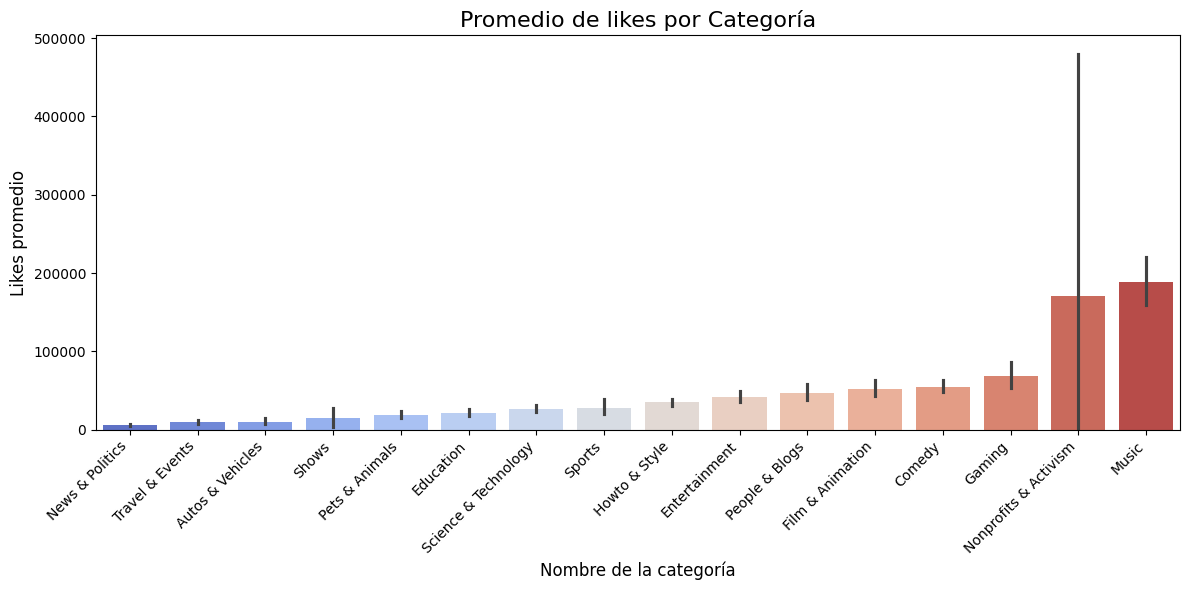

In [20]:
sorted_categories = df_last.groupby('category_name')['likes'].mean().sort_values().index

plt.figure(figsize=(12, 6))  

sns.barplot(
    x='category_name',
    y='likes',
    data=df_last,
    order=sorted_categories, 
    palette="coolwarm"       
)

plt.title("Promedio de likes por Categoría", fontsize=16)
plt.xlabel("Nombre de la categoría", fontsize=12)
plt.ylabel("Likes promedio", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

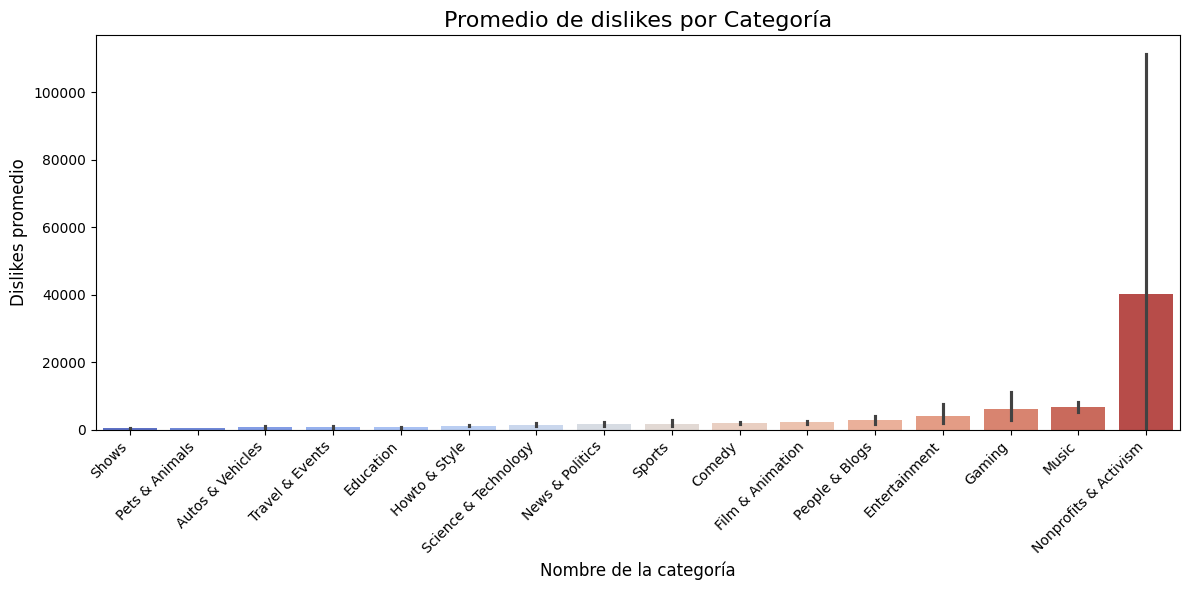

In [21]:
sorted_categories = df_last.groupby('category_name')['dislikes'].mean().sort_values().index

plt.figure(figsize=(12, 6))  

sns.barplot(
    x='category_name',
    y='dislikes',
    data=df_last,
    order=sorted_categories, 
    palette="coolwarm"       
)

plt.title("Promedio de dislikes por Categoría", fontsize=16)
plt.xlabel("Nombre de la categoría", fontsize=12)
plt.ylabel("Dislikes promedio", fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()  
plt.show()

In [22]:
max_title_length = 30
number_of_creators = 10

# Corregimos la agregación
top_creators = df_last.groupby('category_name').size().reset_index(name='code_count')
top_creators = top_creators.sort_values('code_count', ascending=False).head(number_of_creators)

# Creamos el gráfico de barras
trace1 = go.Bar(
    y = [(x if len(x) <= max_title_length else x[:max_title_length] + "...") 
         for x in top_creators.category_name.values][::-1],
    x = top_creators['code_count'].values[::-1],
    name = "Top categories",
    orientation = 'h',
    marker=dict(
        color='rgba(55, 128, 191, 0.7)',
        line=dict(
            color='rgba(55, 128, 191, 1.0)',
            width=2,
        )
    ),
)

data = [trace1]

layout = go.Layout(
    title = dict(
        text='Las categorías más influyentes',
        x=0.5,
        font=dict(size=20)
    ),
    width=900,
    height=600,
    margin=dict(  
        l=180,
        r=50,
        b=80,
        t=80,
        pad=10
    ),
    paper_bgcolor='rgb(244, 238, 225)',
    plot_bgcolor='rgb(244, 238, 225)',
    yaxis = dict(
        anchor = 'x',
        rangemode='tozero',
        tickfont=dict(
            size=10
        ),
        ticklen=1,
        title=dict(text='Nombre del canal')
    ), 
    xaxis = dict(
        title=dict(
            text='Número de veces que un video de cada categoría se volvió tendencia',
            font=dict(size=12)
        ),
        anchor = 'x',
        rangemode='tozero'
    ), 
    legend=dict(x=0.6, y=0.07)
)

fig = go.Figure(data=data, layout=layout)

# Para notebooks de Jupyter, usa:
py.init_notebook_mode(connected=True)
py.iplot(fig)

In [23]:
hist_data = [df_last["log_dislikes"].values, df_last["log_likes"].values]

group_labels = ['Distribución del Log de dislikes', 'Distribución del Log de likes']
colors = ['#A6ACEC', '#63F5EF']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, colors=colors,
                         bin_size=0.5, show_rug=False)

# Add title
fig['layout'].update(title='Likes vs dislikes', legend=dict(x=0.65, y=0.8))

# Plot!
py.iplot(fig, filename='Hist and Curve')

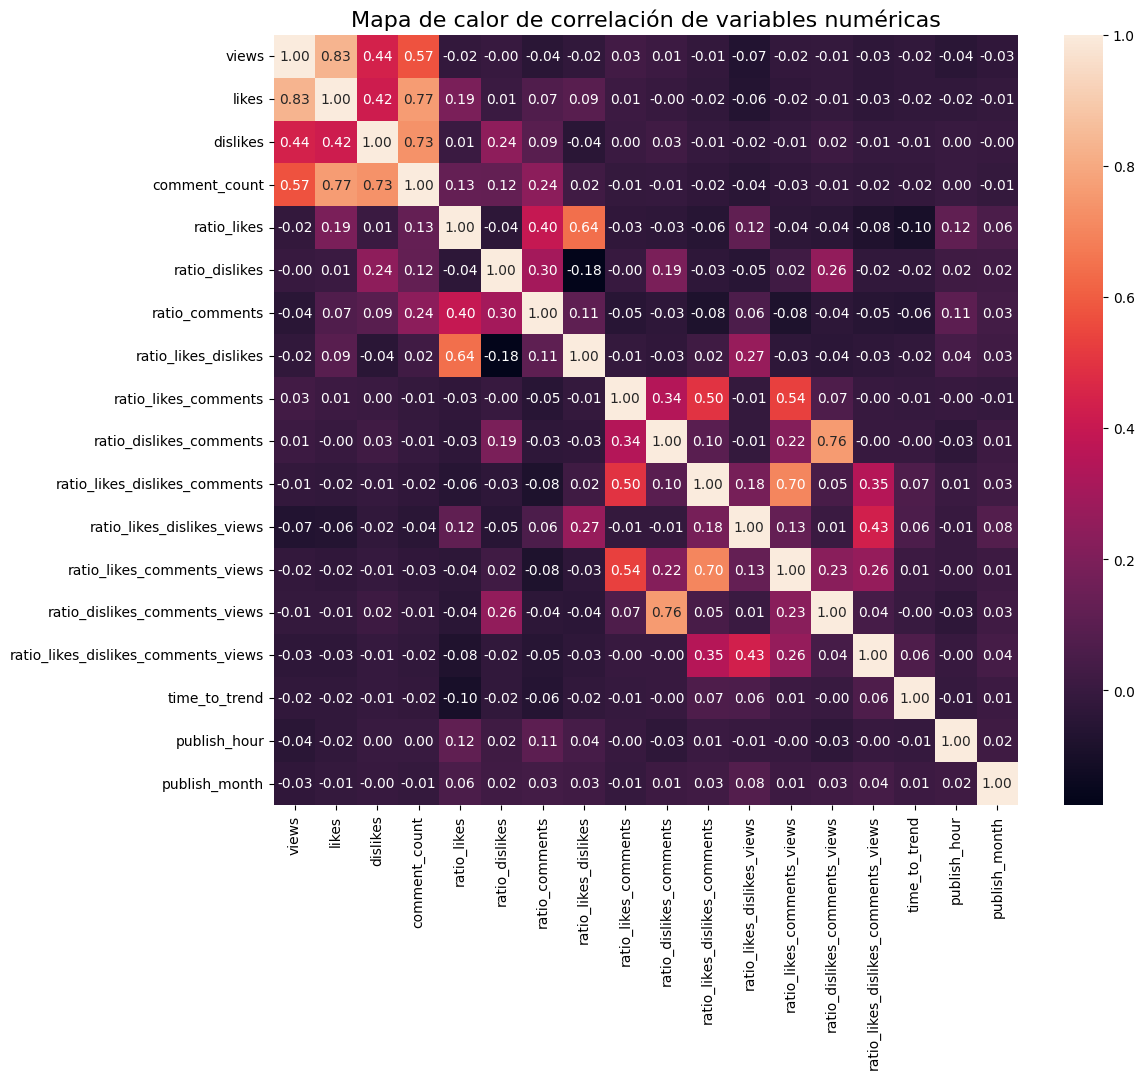

In [24]:
# Mapa de calor de correlación de variables numéricas
cols = ['views', 'likes', 'dislikes', 'comment_count', 'ratio_likes', 'ratio_dislikes', 'ratio_comments', 'ratio_likes_dislikes', 'ratio_likes_comments', 'ratio_dislikes_comments', 'ratio_likes_dislikes_comments', 'ratio_likes_dislikes_views', 'ratio_likes_comments_views', 'ratio_dislikes_comments_views', 'ratio_likes_dislikes_comments_views', 'time_to_trend', 'publish_hour', 'publish_month']

plt.figure(figsize=(12, 10))
sns.heatmap(df_last[cols].corr(), annot=True, fmt=".2f")
plt.title("Mapa de calor de correlación de variables numéricas", fontsize=16)
plt.show()

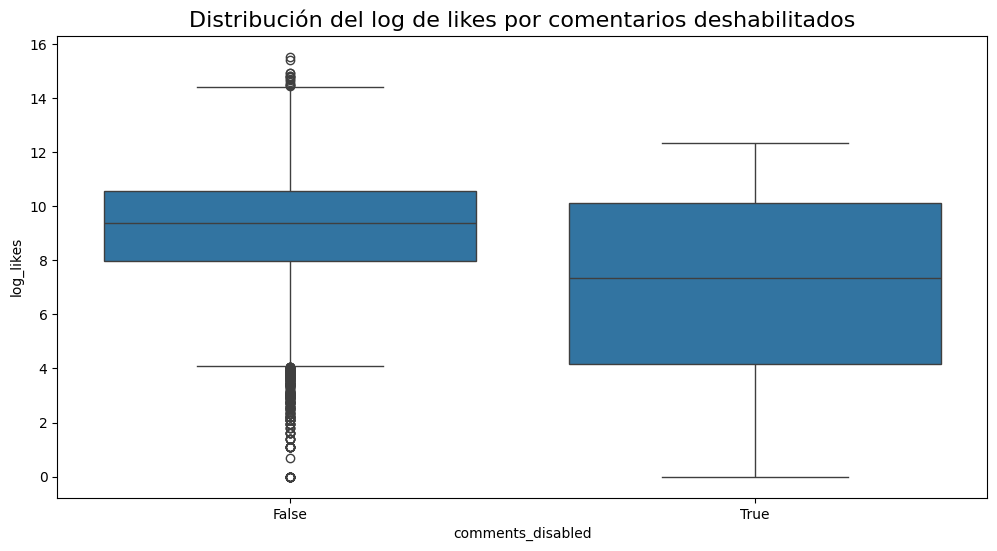

In [25]:
# Distribución de likes por comments_disables
plt.figure(figsize=(12, 6))
sns.boxplot(x='comments_disabled', y='log_likes', data=df_last)
plt.title("Distribución del log de likes por comentarios deshabilitados", fontsize=16)
plt.show()

Ahora creamos y analizamos algunas variables categóricas a través del nlp process

In [26]:
# Realizamos algunos tratamientos sobre las descripciones, títulos, etc.
#nlp
import string
import re    #for regex
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
# Tweet tokenizer does not split at apostophes which is what we want
from nltk.tokenize import TweetTokenizer   

In [27]:
#Setting the stopwords
nltk.download('stopwords')
eng_stopwords = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Predator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
#Word count in each comment:
df_last['count_word']=df_last["title"].apply(lambda x: len(str(x).split()))
df_last['count_word_tags']=df_last["tags"].apply(lambda x: len(str(x).split()))

#Unique word count
df_last['count_unique_word']=df_last["title"].apply(lambda x: len(set(str(x).split())))
df_last['count_unique_word_tags']=df_last["tags"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_last['count_letters']=df_last["title"].apply(lambda x: len(str(x)))
df_last['count_letters_tags']=df_last["tags"].apply(lambda x: len(str(x)))

#punctuation count
df_last["count_punctuations"] =df_last["title"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df_last["count_punctuations_tags"] =df_last["tags"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_last["count_words_upper"] = df_last["title"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))
df_last["count_words_upper_tags"] = df_last["tags"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_last["count_words_title"] = df_last["title"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))
df_last["count_words_title_tags"] = df_last["tags"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_last["count_stopwords"] = df_last["title"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))
df_last["count_stopwords_tags"] = df_last["tags"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

#Average length of the words
df_last["mean_word_len"] = df_last["title"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_last["mean_word_len_tags"] = df_last["tags"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [29]:
#derived features
#Word count percent in each comment:
df_last['word_unique_percent']=df_last['count_unique_word']*100/df_last['count_word']
df_last['word_unique_percent_tags']=df_last['count_unique_word_tags']*100/df_last['count_word_tags']

#Punct percent in each comment:
df_last['punct_percent']=df_last['count_punctuations']*100/df_last['count_word']
df_last['punct_percent_tags']=df_last['count_punctuations_tags']*100/df_last['count_word_tags']

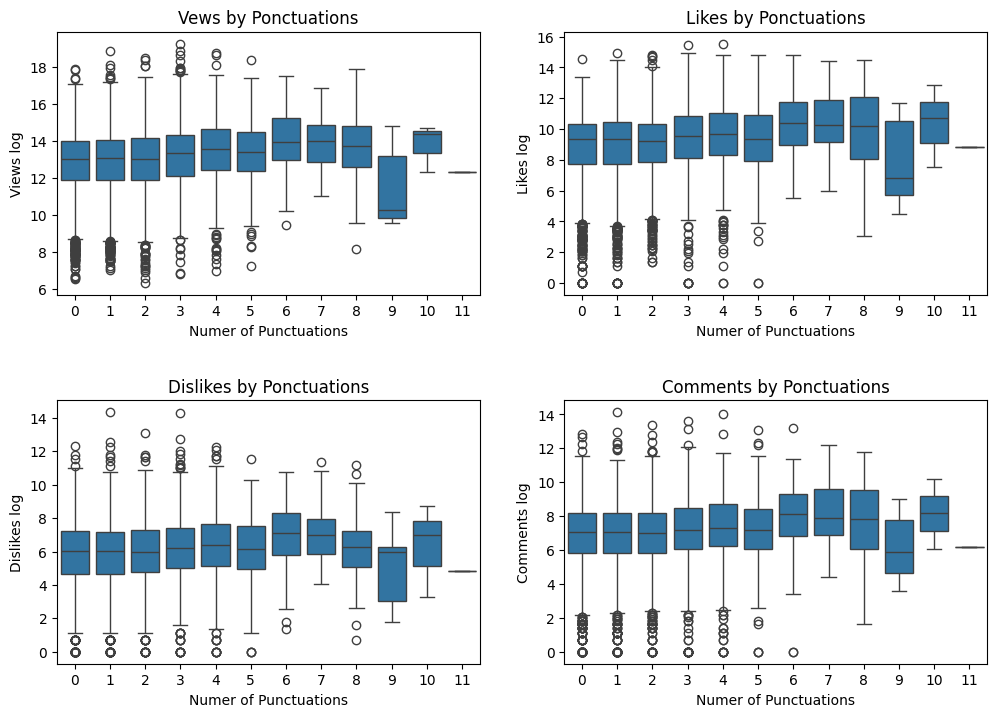

In [30]:
plt.figure(figsize = (12,8))

plt.subplot(221)
g=sns.boxplot(x='count_punctuations', y='log_views',data=df_last)
g.set_title("Vews by Ponctuations")
g.set_xlabel("Numer of Punctuations")
g.set_ylabel("Views log")

plt.subplot(222)
g1 = sns.boxplot(x='count_punctuations', y='log_likes',data=df_last)
g1.set_title("Likes by Ponctuations")
g1.set_xlabel("Numer of Punctuations")
g1.set_ylabel("Likes log")

plt.subplot(223)
g2 = sns.boxplot(x='count_punctuations', y='log_dislikes',data=df_last)
g2.set_title("Dislikes by Ponctuations")
g2.set_xlabel("Numer of Punctuations")
g2.set_ylabel("Dislikes log")

plt.subplot(224)
g3 = sns.boxplot(x='count_punctuations', y='log_comment_count',data=df_last)
g3.set_title("Comments by Ponctuations")
g3.set_xlabel("Numer of Punctuations")
g3.set_ylabel("Comments log")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

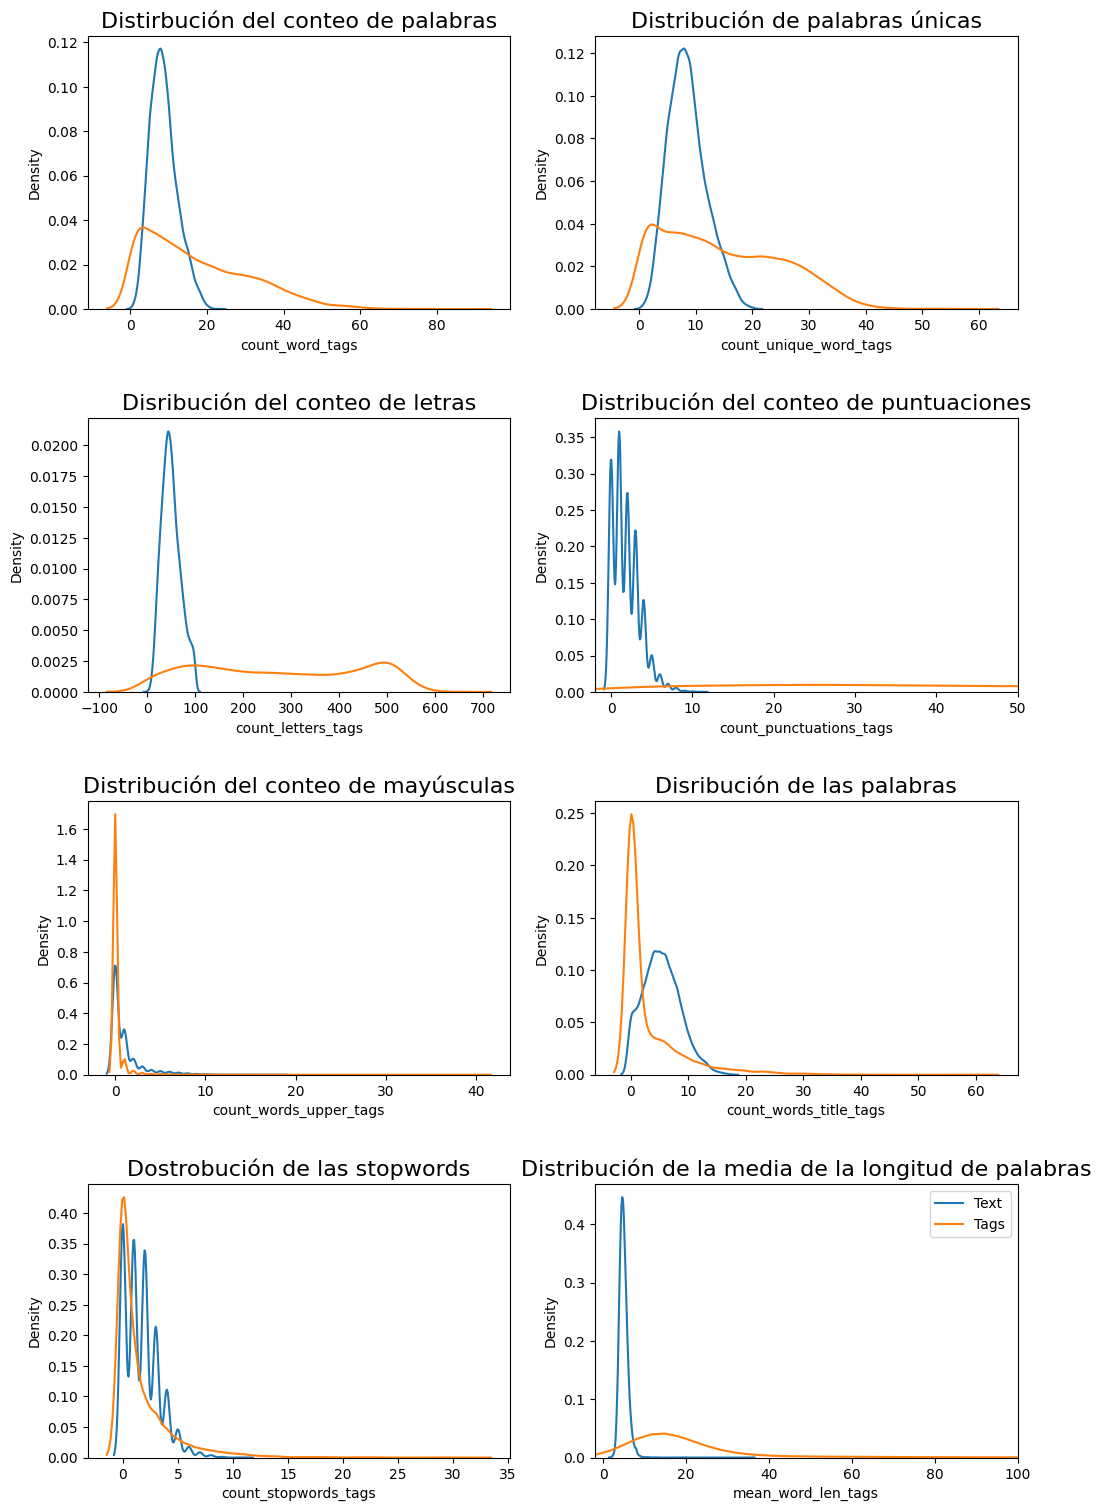

In [31]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df_last['count_word'], 
                  hist=False, label='Text')
g1 = sns.distplot(df_last['count_word_tags'], 
                  hist=False, label='Tags')
g1.set_title("Distirbución del conteo de palabras", fontsize=16)

plt.subplot(422)
g2 = sns.distplot(df_last['count_unique_word'],
                  hist=False, label='Text')
g2 = sns.distplot(df_last['count_unique_word_tags'], 
                  hist=False, label='Tags')
g2.set_title("Distribución de palabras únicas", fontsize=16)

plt.subplot(423)
g3 = sns.distplot(df_last['count_letters'], 
                  hist=False, label='Text')
g3 = sns.distplot(df_last['count_letters_tags'], 
                  hist=False, label='Tags')
g3.set_title("Disribución del conteo de letras", fontsize=16)

plt.subplot(424)
g4 = sns.distplot(df_last["count_punctuations"], 
                  hist=False, label='Text')
g4 = sns.distplot(df_last["count_punctuations_tags"], 
                  hist=False, label='Tags')
g4.set_xlim([-2,50])
g4.set_title('Distribución del conteo de puntuaciones', fontsize=16)

plt.subplot(425)
g5 = sns.distplot(df_last["count_words_upper"] , 
                  hist=False, label='Text')
g5 = sns.distplot(df_last["count_words_upper_tags"] , 
                  hist=False, label='Tags')
g5.set_title('Distribución del conteo de mayúsculas', fontsize=16)

plt.subplot(426)
g6 = sns.distplot(df_last["count_words_title"], 
                  hist=False, label='Text')
g6 = sns.distplot(df_last["count_words_title_tags"], 
                  hist=False, label='Tags')
g6.set_title('Disribución de las palabras', fontsize=16)

plt.subplot(427)
g7 = sns.distplot(df_last["count_stopwords"], 
                  hist=False, label='Title')
g7 = sns.distplot(df_last["count_stopwords_tags"], 
                  hist=False, label='Tags')
g7.set_title('Dostrobución de las stopwords', fontsize=16)

plt.subplot(428)
g8 = sns.distplot(df_last["mean_word_len"], 
                  hist=False, label='Text')
g8 = sns.distplot(df_last["mean_word_len_tags"], 
                  hist=False, label='Tags')
g8.set_xlim([-2,100])
g8.set_title('Distribución de la media de la longitud de palabras', fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)
plt.legend()
plt.show()

Finalmente realizamos algunas visualizaciones de las variables categóricas a través de nube de palabras

In [32]:
from wordcloud import WordCloud

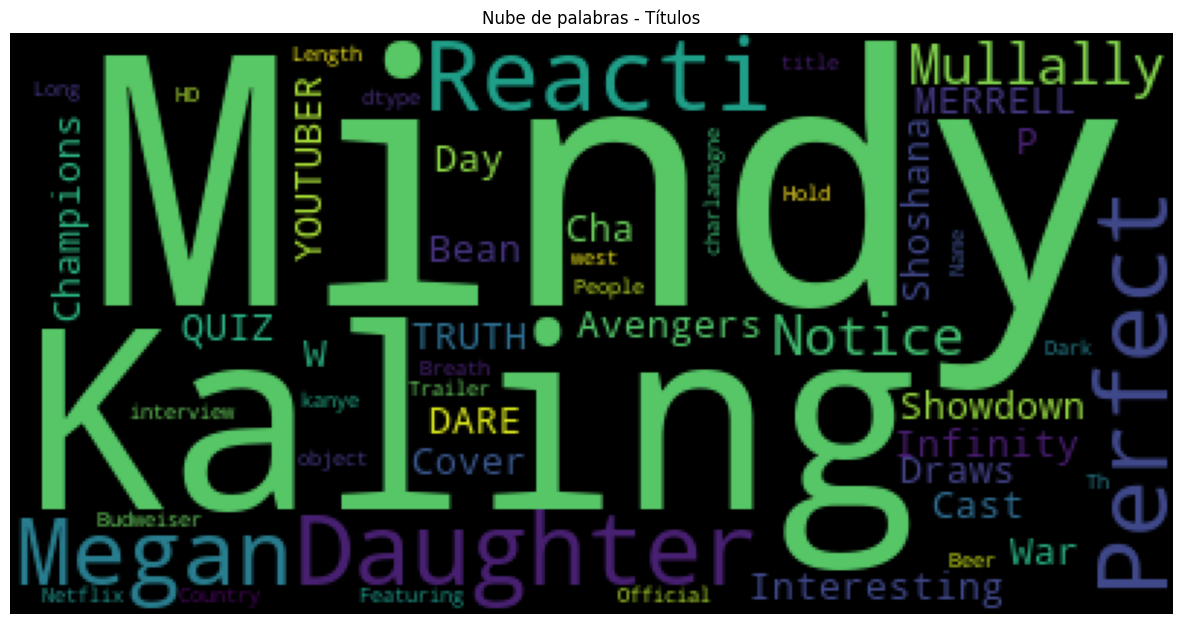

In [33]:
plt.figure(figsize = (15,15))

stopwords = set(eng_stopwords)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_last['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("Nube de palabras - Títulos")
plt.axis('off')
plt.show()

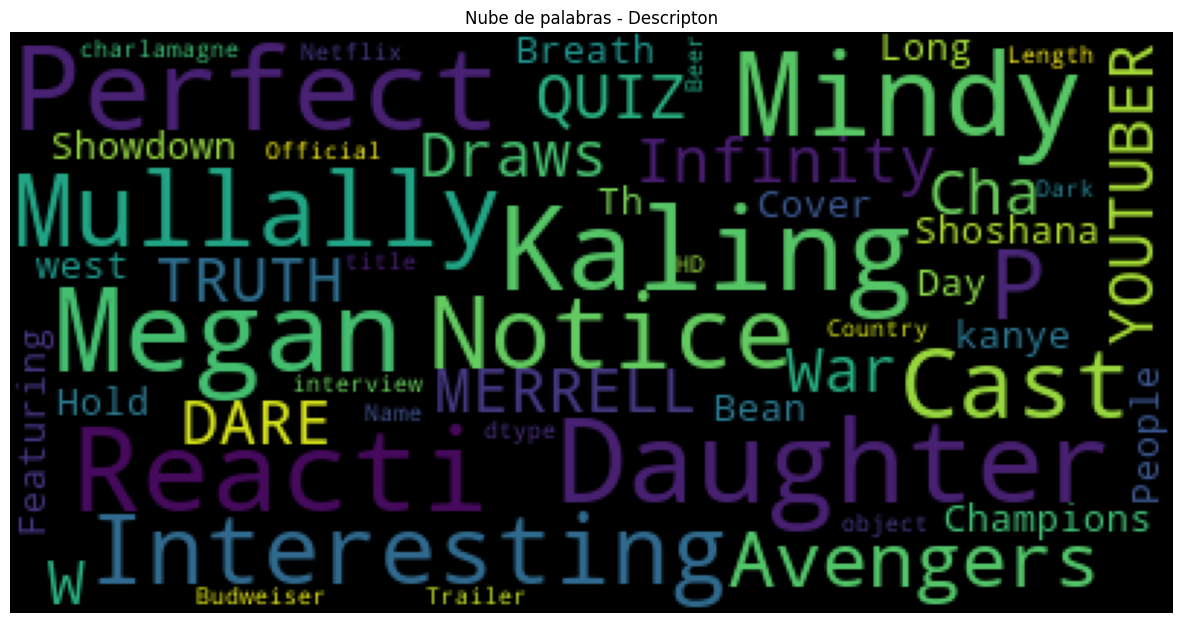

In [34]:
plt.figure(figsize = (15,15))

stopwords = set(eng_stopwords)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=150,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(df_last['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("Nube de palabras - Descripton")
plt.axis('off')
plt.show()

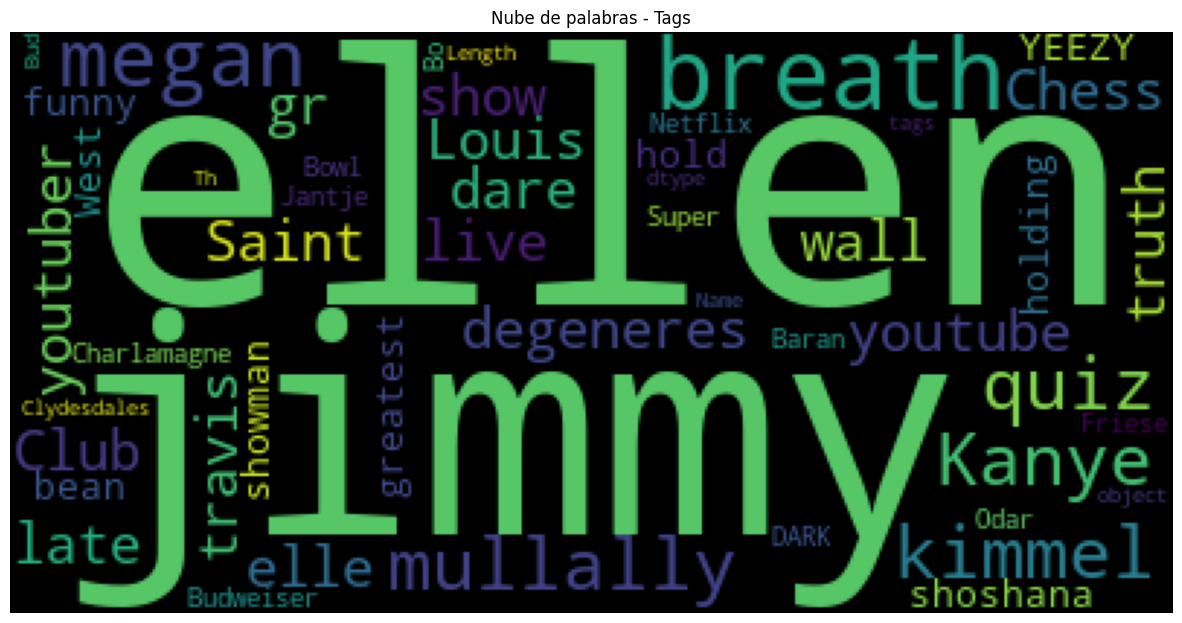

In [35]:
plt.figure(figsize = (15,15))

stopwords = set(eng_stopwords)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_last['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("Nube de palabras - Tags")
plt.axis('off')
plt.show()

En este análisis exploratorio de datos hemos hecho lo siguiente:

- Se han cargado los datos y se han normalizado los datos del json.
- Se han transformado las columnas a datetime y se han creado nuevas columnas.
- Se han obtenido la fecha, el tiempo y la hora, el día de la semana, el mes, el porcentaje de dislikes, el logaritmo de las vistas, el logaritmo de los likes, el logaritmo de los dislikes y el logaritmo de los comentarios.
- Se han obtenido variables como el ratio de likes, el ratio de dislikes, el ratio de comentarios, el ratio de vistas, el ratio de likes y dislikes, el ratio de likes y comentarios, el ratio de dislikes y comentarios, el ratio de likes y vistas, el ratio de dislikes y vistas, el ratio de comentarios y vistas, el ratio de likes y dislikes y comentarios, el ratio de likes y dislikes y vistas, el ratio de likes y comentarios y vistas, el ratio de dislikes y comentarios y vistas, el ratio de likes y dislikes y comentarios y vistas.
- Se ha obtenido el número de días que un video tarda en convertirse en tendencia.
- Se han escogido los 10 videos más populares.
- Se ha realizado un gráfico para ver el mejor momento para publicar un video.
- Se ha realizado un gráfico para ver el mejor mes para publicar un video.
- Se ha realizado un gráfico para ver el promedio de visualizaciones por categoría.
- Se ha realizado un gráfico para ver el promedio de likes por categoría.
- Se ha realizado un gráfico para ver el promedio de dislikes por categoría.
- Se ha realizado un gráfico para ver las categorías más influyentes.
- Se ha realizado un gráfico para ver la distribución del log de likes por comentarios deshabilitados.
- Se ha realizado un gráfico para ver el mapa de calor de correlación de variables numéricas.
- Se ha realizado un gráfico para ver la distribución de likes por comentarios deshabilitados.
- Se han creado y analizado algunas variables categóricas a través del nlp process.
- Se han realizado algunas visualizaciones de las variables categóricas a través de nube de palabras.


Finalmente se guardan los datos en un nuevo archivo csv, con las columnas a trabajar en un modelo para predecir el número de likes.

In [36]:
df_last.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,count_words_title,count_words_title_tags,count_stopwords,count_stopwords_tags,mean_word_len,mean_word_len_tags,word_unique_percent,word_unique_percent_tags,punct_percent,punct_percent_tags
40208,-0CMnp02rNY,2018-06-11,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00,"ellen|""ellen degeneres""|""the ellen show""|""elle...",800359,9773,332,...,7,0,3,5,5.818182,11.846154,100.0,87.179487,18.181818,253.846154
15457,-0NYY8cqdiQ,2018-02-01,Megan Mullally Didn't Notice the Interesting P...,TheEllenShow,24,2018-01-29 14:00:39,"megan mullally|""megan""|""mullally""|""will and gr...",563746,4429,54,...,6,0,3,4,6.600000,23.187500,100.0,93.750000,20.000000,600.000000
31992,-1Hm41N0dUs,2018-05-01,Cast of Avengers: Infinity War Draws Their Cha...,Jimmy Kimmel Live,23,2018-04-27 07:30:02,"jimmy|""jimmy kimmel""|""jimmy kimmel live""|""late...",2058516,41248,580,...,7,2,2,0,5.750000,16.315789,100.0,100.000000,12.500000,357.894737
3711,-1yT-K3c6YI,2017-12-02,YOUTUBER QUIZ + TRUTH OR DARE W/ THE MERRELL T...,Molly Burke,22,2017-11-28 18:30:43,"youtube quiz|""youtuber quiz""|""truth or dare""|""...",231341,7734,212,...,1,0,2,1,4.200000,14.571429,100.0,100.000000,30.000000,300.000000
584,-2RVw2_QyxQ,2017-11-16,2017 Champions Showdown: Day 3,Saint Louis Chess Club,27,2017-11-12 02:39:01,"Chess|""Saint Louis""|""Club""",71089,460,27,...,3,2,0,0,5.200000,12.500000,100.0,100.000000,20.000000,300.000000


In [37]:
df_last.to_csv('youtube-new/USvideos_last.csv', index=False)